### Part I: EDA analysis

In [75]:
#read json data into python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
login_df=pd.read_json('logins.json')
login_df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [76]:
login_df.describe()

,login_time
count,93142
unique,92265
top,1970-04-04 01:17:40
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [77]:
login_df.isna().sum()

login_time    0
dtype: int64

In [78]:
login_df.dtypes

login_time    datetime64[ns]
dtype: object

In [79]:
#There is no missing data in this data set, but there is duplicate considering count N > unique N. It can be regarded as multiple login in very short period.
login_df.duplicated().sum()

877

In [80]:
login_df.sort_values(by='login_time').head()

,login_time
6,1970-01-01 20:12:16
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
3,1970-01-01 20:16:36
2,1970-01-01 20:16:37


In [81]:
#check the login_freq every 15 min
login_df_15min = login_df.copy().set_index(['login_time'])
login_df_15min['login_freq'] = 0
login_df_15min = login_df_15min.resample('15T').count()
login_df_15min.head()

,login_freq
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [82]:
#check the day of week information in each login 
login_df_15min['day_of_week'] = login_df_15min.index.dayofweek
days = {0:'Monday',1:'Tuesday',2:'Wedsday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
login_df_15min['day_of_week'] = login_df_15min['day_of_week'].apply(lambda x: days[x])
login_df_15min.head()

,login_freq,day_of_week
login_time,,
1970-01-01 20:00:00,2,Thursday
1970-01-01 20:15:00,6,Thursday
1970-01-01 20:30:00,9,Thursday
1970-01-01 20:45:00,7,Thursday
1970-01-01 21:00:00,1,Thursday


In [83]:
len(login_df_15min)

9788

In [84]:
print(login_df_15min.index.min(), login_df_15min.index.max())

1970-01-01 20:00:00 1970-04-13 18:45:00


Text(0, 0.5, 'login frequency')

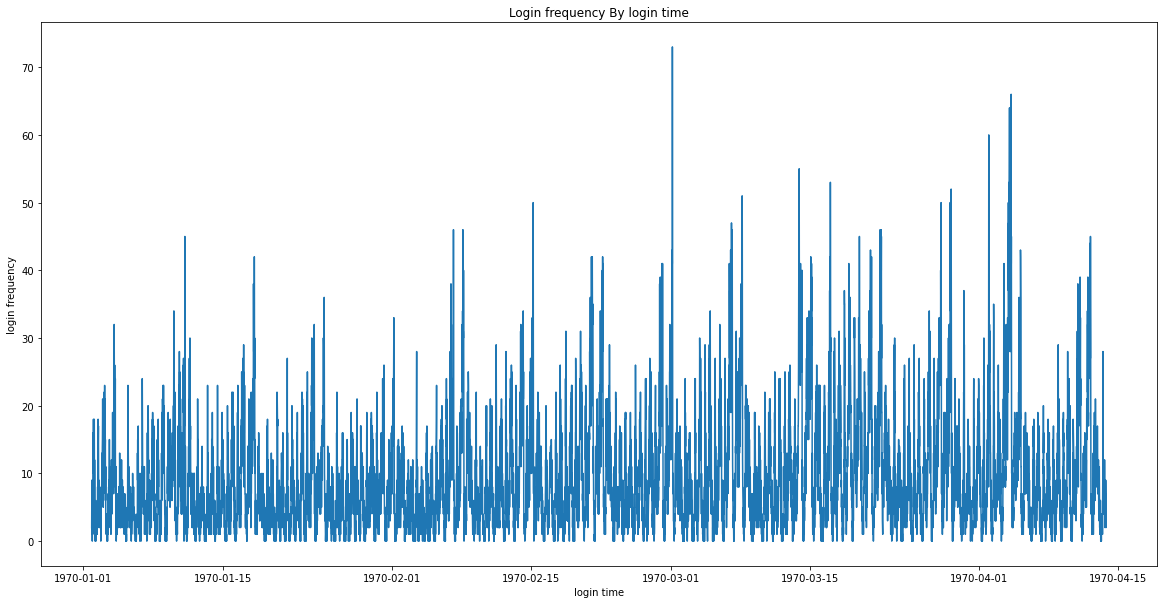

In [85]:
# Check the distribution of login freq every 15 min from 1970-01-01 20:00:00 to 1970-04-13 18:45:00
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(login_df_15min.login_freq)
ax.set_title('Login frequency By login time')
ax.set_xlabel('login time')
ax.set_ylabel('login frequency')

Text(0, 0.5, 'Login frequency')

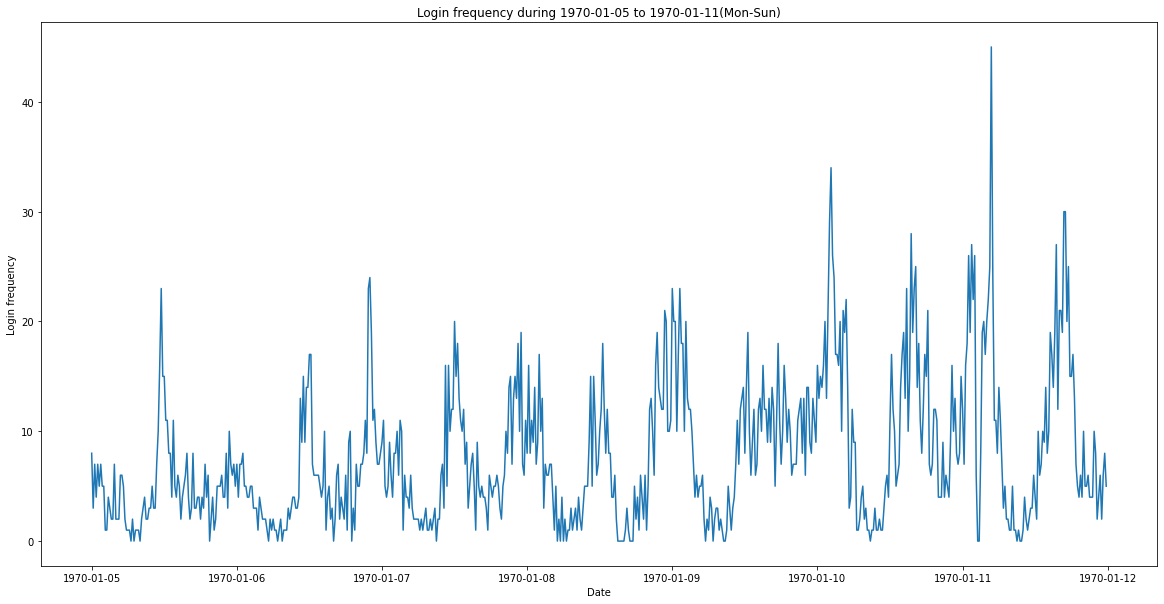

In [86]:
#let's zoom in the data a little bit by checking an axample of 1 week change
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(login_df_15min.loc['1970-01-05':'1970-01-11'].login_freq)
ax.set_title('Login frequency during 1970-01-05 to 1970-01-11(Mon-Sun)')
ax.set_xlabel('Date')
ax.set_ylabel('Login frequency')

Text(0, 0.5, 'Login frequency')

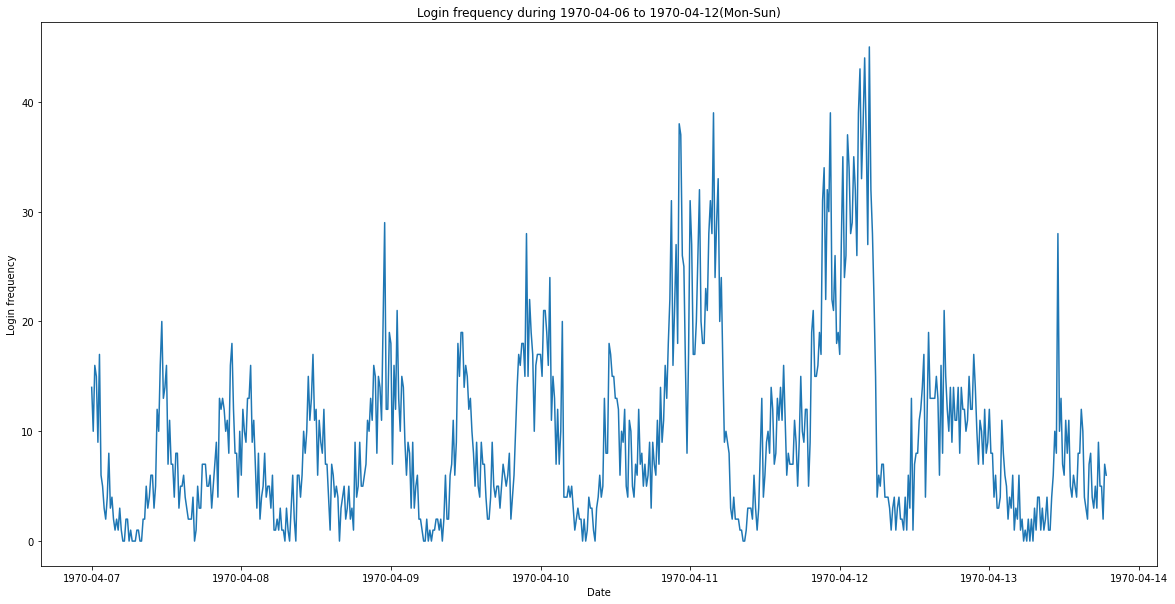

In [87]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(login_df_15min.loc['1970-04-07':'1970-04-14'].login_freq)
ax.set_title('Login frequency during 1970-04-06 to 1970-04-12(Mon-Sun)')
ax.set_xlabel('Date')
ax.set_ylabel('Login frequency')

In [88]:
#From the above plot, we can see there is seasonality daily and there is maybe trend.
#let's check the week_of_day login_freq distribution
monday_login=login_df_15min.loc[login_df_15min.day_of_week =='Monday']
monday_login_aggr=monday_login.groupby([monday_login.index.hour, monday_login.index.minute]).sum()
monday_login_aggr.head(20)

login_freq
login_time login_time            
0          0                  126
           15                 140
           30                 144
           45                 121
1          0                  109
           15                 108
           30                 105
           45                  92
2          0                   91
           15                  70
           30                  85
           45                  66
3          0                   52
           15                  77
           30                  51
           45                  56
4          0                   40
           15                  54
           30                  52
           45                  60

In [89]:
monday_login_aggr.index.set_names(['hour','min'], inplace=True)
monday_login_aggr.head(20)

login_freq
hour min            
0    0           126
     15          140
     30          144
     45          121
1    0           109
     15          108
     30          105
     45           92
2    0            91
     15           70
     30           85
     45           66
3    0            52
     15           77
     30           51
     45           56
4    0            40
     15           54
     30           52
     45           60

Text(0, 0.5, 'Login frequency')

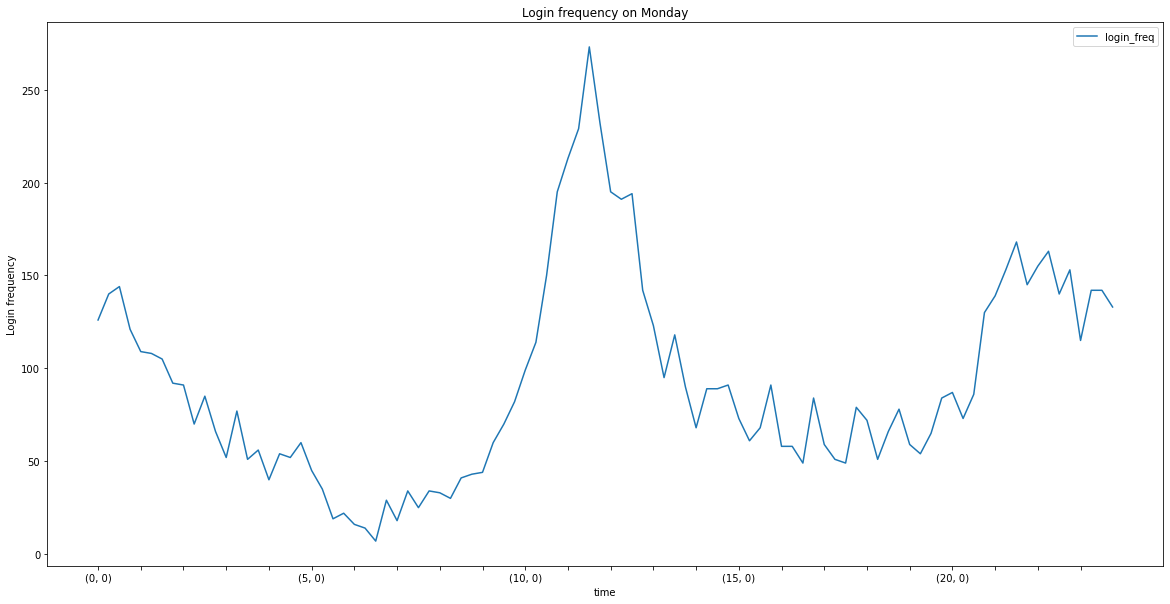

In [90]:
fig, ax = plt.subplots(figsize=(20, 10))
monday_login_aggr.plot(legend=True, ax=ax)
ax.set_title('Login frequency on Monday')
ax.set_xticks(np.arange(0, len(monday_login_aggr), 4))
ax.set_xlabel('time')
ax.set_ylabel('Login frequency')

In [91]:
login_df_15min.day_of_week.value_counts()

Sunday      1440
Friday      1440
Saturday    1440
Monday      1420
Thursday    1360
Tuesday     1344
Wedsday     1344
Name: day_of_week, dtype: int64

In [92]:
def week_of_day_df(week_of_day):
    df=login_df_15min.loc[login_df_15min.day_of_week ==week_of_day]
    df_aggr=df.groupby([df.index.hour, df.index.minute]).sum()
    df_aggr.index.set_names(['hour','min'], inplace=True)
    return df_aggr
df_plot=[week_of_day_df(day) for day in days.values()]

In [93]:
len(df_plot)

7

Text(0, 0.5, 'Login frequency')

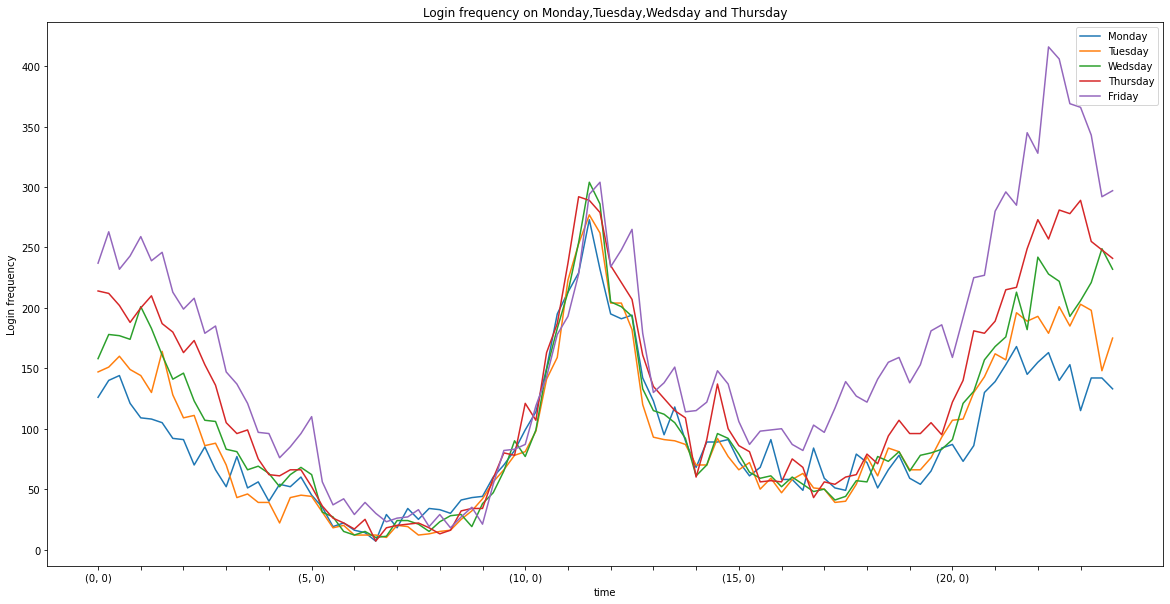

In [94]:
fig, ax = plt.subplots(figsize=(20,10))
df_plot[0].plot(ax=ax)
df_plot[1].plot(ax=ax)
df_plot[2].plot(ax=ax)
df_plot[3].plot(ax=ax)
df_plot[4].plot(ax=ax)
plt.legend(['Monday','Tuesday','Wedsday','Thursday', 'Friday'])
ax.set_title('Login frequency on Monday,Tuesday,Wedsday and Thursday')
ax.set_xticks(np.arange(0, len(monday_login_aggr), 4))
ax.set_xlabel('time')
ax.set_ylabel('Login frequency')

Text(0, 0.5, 'Login frequency')

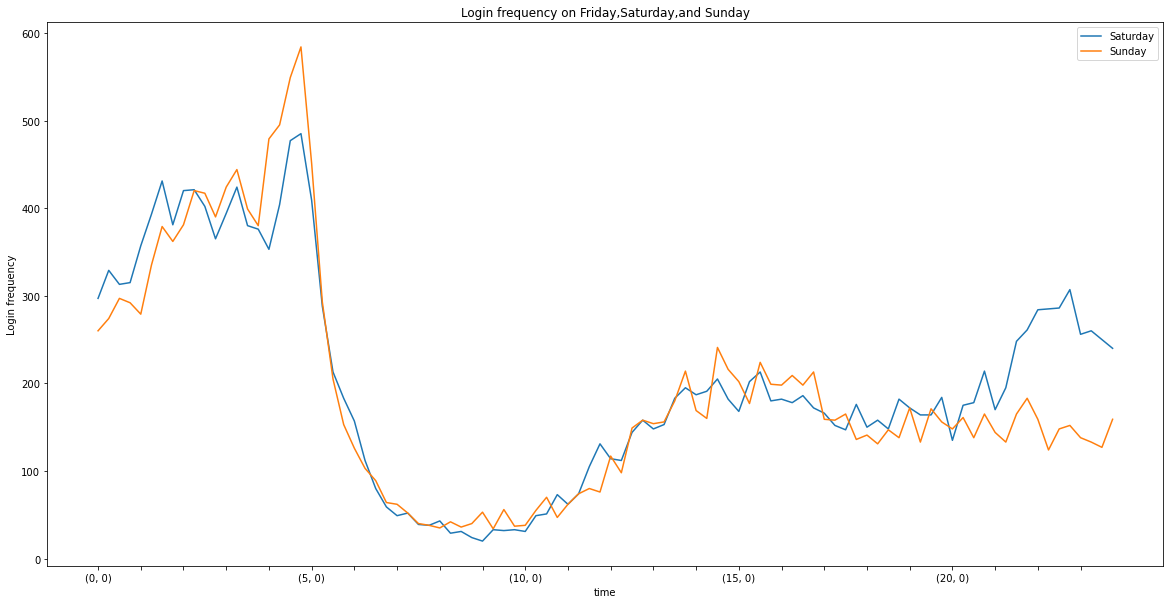

In [95]:
fig, ax = plt.subplots(figsize=(20,10))
df_plot[5].plot(ax=ax)
df_plot[6].plot(ax=ax)
plt.legend(['Saturday','Sunday'])
ax.set_title('Login frequency on Friday,Saturday,and Sunday')
ax.set_xticks(np.arange(0, len(monday_login_aggr), 4))
ax.set_xlabel('time')
ax.set_ylabel('Login frequency')

Monday, Tuesday, Wedsday and Thursday has the similar pattern; saturday and sunday has the similart pattern. Weekday and weekend have different pattern. At weekday, the peak of login frequency appeared at noon. But as the approach of weekend, the peak of the login frequency began to switch from noon to midnight.

In [96]:
day_of_week_sum=login_df_15min.groupby(login_df_15min['day_of_week']).sum()

<AxesSubplot:xlabel='day_of_week'>

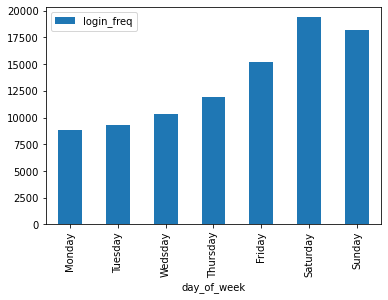

In [97]:
 day_of_week_sum.loc[days.values()].plot(kind='bar')

In [98]:
login_df_15min.groupby(login_df_15min.index.month).sum()
#The login frequency increases in the first three month. We only has partial data from April.

,login_freq
login_time,
1,21239
2,24673
3,33723
4,13507


The login frequency also increased from weekday to weekend.

### Part II: experiment and matrics desgign

This problem can be evaluated by hypothesis test between before the implementation of the reimbursing policy (A) and after the implementation of reimbursing policy(B):
1. Collect all driver informations registered in the two cities, Gotham and Metropolis.
2. randomly select equal large enough size of drivers from these two cities.(random block sampling)
3. provide half of the selected drivers with the reimbursing policy and half of them without the reimbursing policyin each city. (define control group and treated group, or we can say A/B test)
4. Given a reasonable test period, for example 2-3 months and check their reimbursing activies of the control and treated groups. If there is significant difference between them and the group given reimbursing policy has more inter-city acitivies than the group without given the policy, it means the policy works. Otherwise, No

### Part III. predictive modeling

#### 3.1 EDA and data wrangling

In [99]:
# load json file into dataframe
import json
with open('ultimate_data_challenge.json') as file:
    ultimate_data = json.load(file)
ultimate_df = pd.DataFrame(ultimate_data)
ultimate_df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


● city: city this user signed up in
● phone: primary device for this user
● signup_date: date of account registration; in the form ‘YYYYMMDD’
● last_trip_date: the last time this user completed a trip; in the form ‘YYYYMMDD’
● avg_dist: the average distance in miles per trip taken in the first 30 days after signup
● avg_rating_by_driver: the rider’s average rating over all of their trips
● avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
● surge_pct: the percent of trips taken with surge multiplier > 1
● avg_surge: The average surge multiplier over all of this user’s trips
● trips_in_first_30_days: the number of trips this user took in the first 30 days after
signing up
● ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days;
FALSE otherwise
● weekday_pct: the percent of the user’s trips occurring during a weekday

In [100]:
ultimate_df.dtypes

city                       object
trips_in_first_30_days      int64
signup_date                object
avg_rating_of_driver      float64
avg_surge                 float64
last_trip_date             object
phone                      object
surge_pct                 float64
ultimate_black_user          bool
weekday_pct               float64
avg_dist                  float64
avg_rating_by_driver      float64
dtype: object

In [101]:
ultimate_df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [102]:
ultimate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [103]:
#we have missing values in this data set
ultimate_df.isna().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

In [104]:
#remove missing values from the data
ultimate_df_nomissing=ultimate_df.dropna(axis=0, how='any')
len(ultimate_df_nomissing)

41445

In [105]:
#convert date features into datetime type
ultimate_df_nomissing['last_trip_date']=pd.to_datetime(ultimate_df_nomissing['last_trip_date'],infer_datetime_format=True)
ultimate_df_nomissing['signup_date']=pd.to_datetime(ultimate_df_nomissing['signup_date'],infer_datetime_format=True)

In [106]:
ultimate_df_nomissing['last_trip_date'].max()-ultimate_df_nomissing['last_trip_date'].min()

Timedelta('181 days 00:00:00')

In [107]:
#define users registered in the first month and still active in the sixth month after registration as the active ones
beginning_enroll_date=ultimate_df_nomissing.signup_date.min()
ending_first_month_enroll_date=beginning_enroll_date+pd.Timedelta('30D')
pull_date = ultimate_df_nomissing['last_trip_date'].max()
pull_date_30d=pull_date-pd.Timedelta('30D')
ultimate_df_nomissing['enroll_in_first_month']=0
ultimate_df_nomissing['active_in_last_month']=0
ultimate_df_nomissing['active']=0

In [108]:
ultimate_df_nomissing['enroll_in_first_month'][ultimate_df_nomissing['signup_date']<=ending_first_month_enroll_date]=1
ultimate_df_nomissing['active_in_last_month'][ultimate_df_nomissing['last_trip_date']>=pull_date_30d]=1
ultimate_df_nomissing['active'][(ultimate_df_nomissing['enroll_in_first_month']==1) & (ultimate_df_nomissing.active_in_last_month==1)]=1

In [109]:
ultimate_df_nomissing.active.value_counts()

0    24410
1    17035
Name: active, dtype: int64

In [110]:
ultimate_df_nomissing.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,enroll_in_first_month,active_in_last_month,active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1,1,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,1,0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,1,0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1,1,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,1,0,0


#### 3.1.1 Let's check the distribution of categorical data first

In [111]:
#Let's check the distribution of each features in this data set. We will check the categorical features first
#to develop the model, we need convert categorical data into dummy variables.
#They are city, signup_date, last_strip_date, phone, ultimate_black_user
ultimate_df_nomissing.city.value_counts()

Winterfell        19161
Astapor           13509
King's Landing     8775
Name: city, dtype: int64

Winterfell is the top city with most observations, followed by Astapor and King's Landing

In [112]:
ultimate_df_nomissing['days_between_last_trip_and_signup']=pd.to_datetime(ultimate_df_nomissing.last_trip_date)-pd.to_datetime(ultimate_df_nomissing.signup_date)
ultimate_df_nomissing.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,enroll_in_first_month,active_in_last_month,active,days_between_last_trip_and_signup
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1,1,1,143 days
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,1,0,0,96 days
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,1,0,0,1 days
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1,1,1,170 days
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,1,0,0,47 days


In [113]:
ultimate_df_nomissing.drop(columns=['enroll_in_first_month', 'active_in_last_month'], inplace=True)

In [114]:
ultimate_df_nomissing['days_between_last_trip_and_signup']=ultimate_df_nomissing.days_between_last_trip_and_signup.dt.days

In [115]:
ultimate_df_nomissing.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active,days_between_last_trip_and_signup
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1,143
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0,96
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0,1
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1,170
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0,47


In [116]:
ultimate_df_nomissing.active.value_counts()

0    24410
1    17035
Name: active, dtype: int64

In [117]:
ultimate_df_nomissing.phone.value_counts()

iPhone     29352
Android    12093
Name: phone, dtype: int64

In [118]:
ultimate_df_nomissing.ultimate_black_user.value_counts()

False    25526
True     15919
Name: ultimate_black_user, dtype: int64

non-active users, iphone users and non ultimate_black_users are the primary contributors in this data set.

In [119]:
cat_four_df = ultimate_df_nomissing[['city','phone','ultimate_black_user','active']]
def cat_plot(y, x1, x2, nor_p):
    crosstable=pd.crosstab(cat_four_df[y], [cat_four_df[x1], cat_four_df[x2]], normalize=nor_p)
    plt.figure(figsize=(12,5))
    plt.rcParams['font.size'] = '12'
    f=sns.heatmap(crosstable, cmap="YlGnBu", annot=True, cbar=False)
    return f

<AxesSubplot:xlabel='city-ultimate_black_user', ylabel='active'>

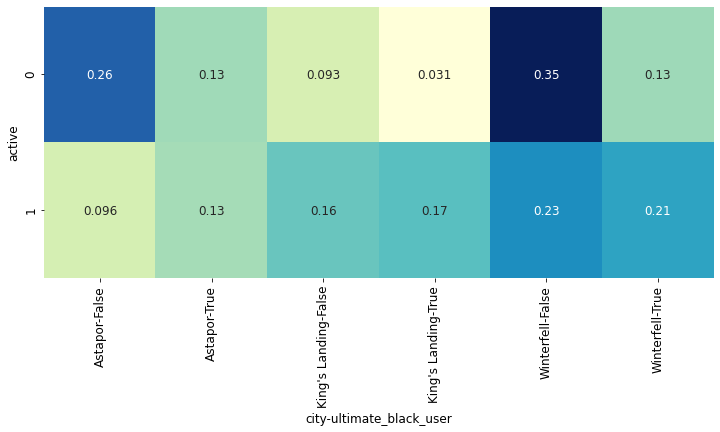

In [121]:
cat_plot('active', 'city', 'ultimate_black_user', 'index')

<AxesSubplot:xlabel='city-phone', ylabel='active'>

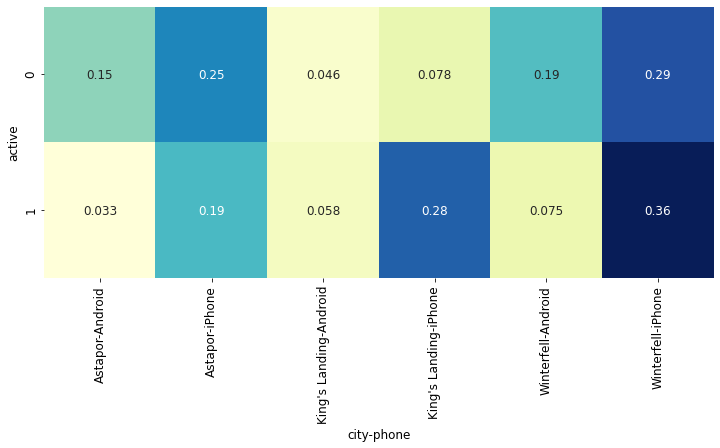

In [122]:
cat_plot('active', 'city', 'phone', 'index')

<AxesSubplot:xlabel='ultimate_black_user-phone', ylabel='active'>

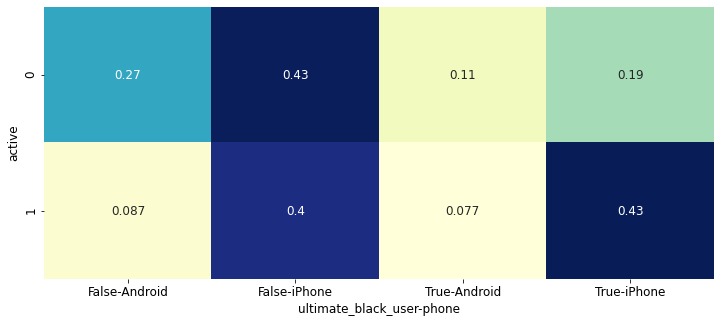

In [123]:
cat_plot('active', 'ultimate_black_user', 'phone', 'index')

When we use multiple categorical features to segment the data, we can find winterfell non ultimate black iphone users are the primary contributors of the retained users.  

#### 3.1.2 the correlation between continous features

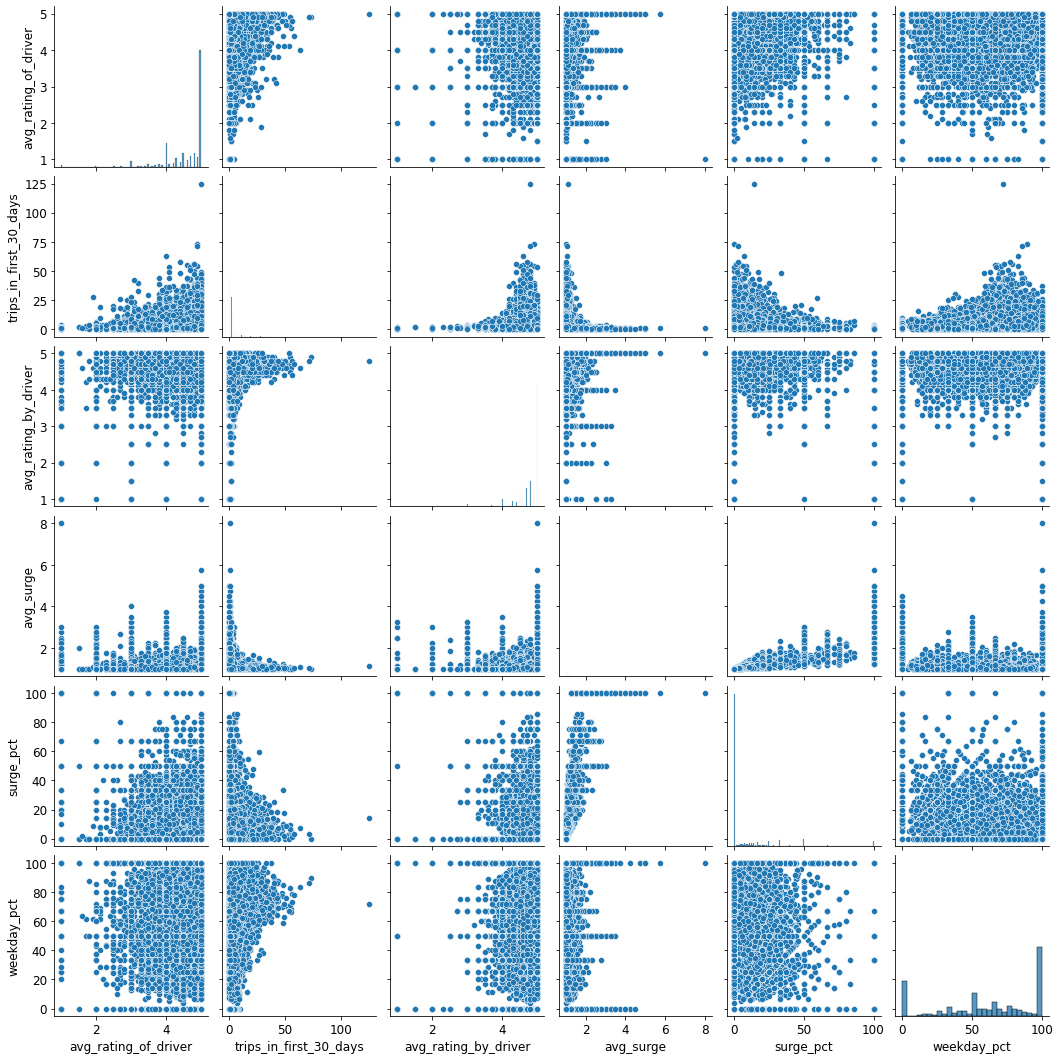

In [124]:
#check the association between retained and the other variables
sns.pairplot(ultimate_df_nomissing[['avg_rating_of_driver', 'trips_in_first_30_days', 'avg_rating_by_driver', 'avg_surge', 'surge_pct', 'weekday_pct']])

We didn't observe the apparent correlations between all the continous features.

#### 3.1.3 distribution of continous features across city and retained status

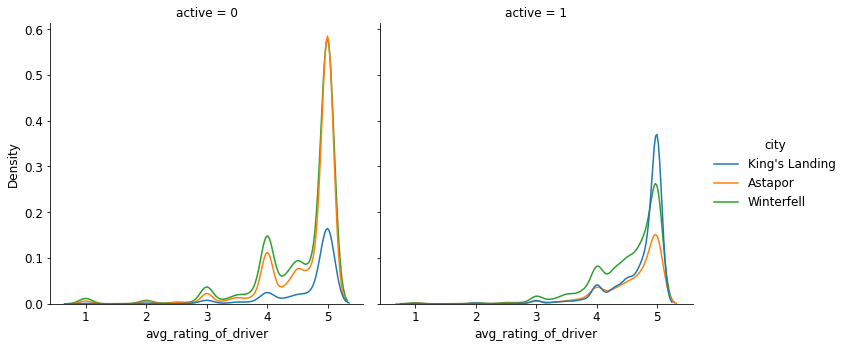

In [125]:
sns.displot(data=ultimate_df_nomissing, x="avg_rating_of_driver", hue="city", col="active", kind="kde")

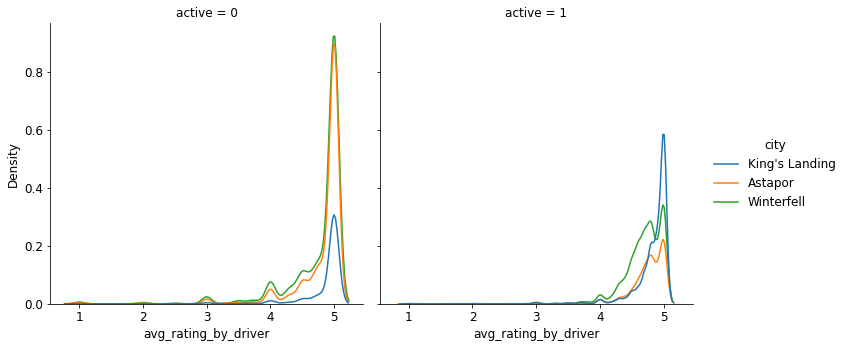

In [126]:
sns.displot(data=ultimate_df_nomissing, x="avg_rating_by_driver", hue="city", col="active", kind="kde")

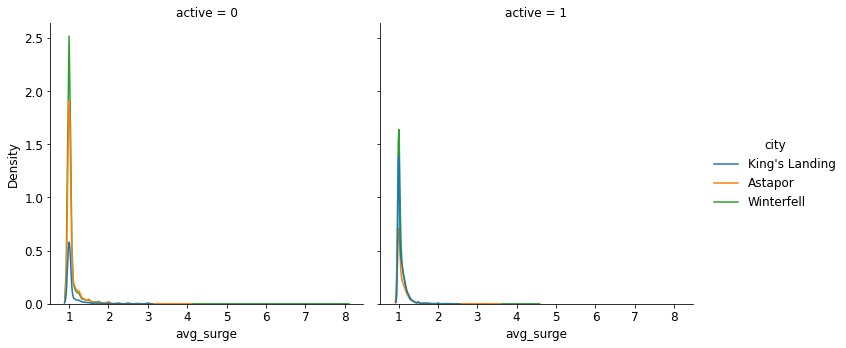

In [127]:
sns.displot(data=ultimate_df_nomissing, x="avg_surge", hue="city", col="active", kind="kde")

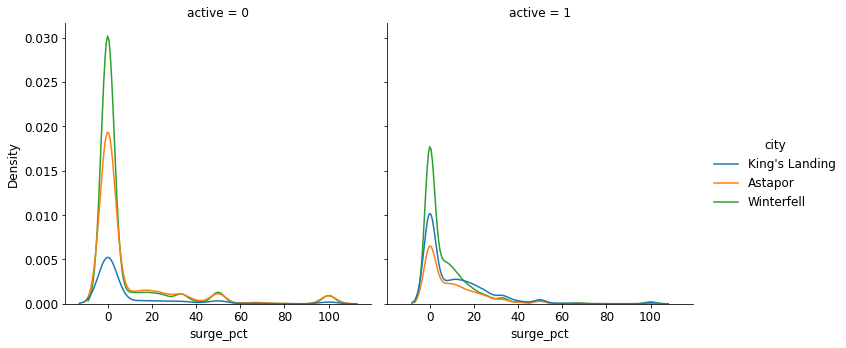

In [128]:
sns.displot(data=ultimate_df_nomissing, x="surge_pct", hue="city", col="active", kind="kde")

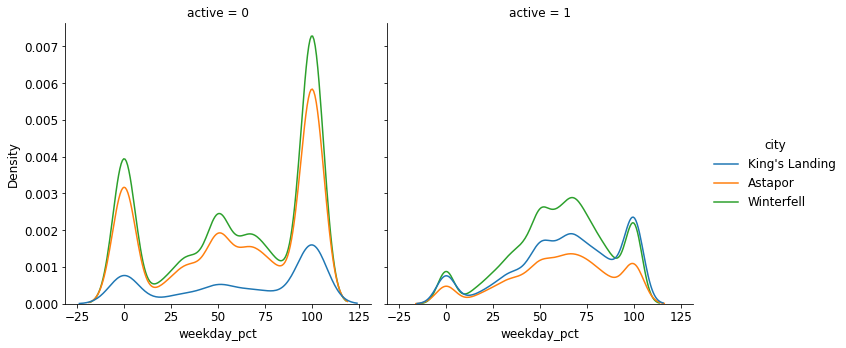

In [129]:
sns.displot(data=ultimate_df_nomissing, x="weekday_pct", hue="city", col="active", kind="kde")

It is interesting that we found the similar distribution of each of all those continous features across different city, but the apparent difference between active users and non-active users.

#### 3.1.4 convert categorical features into numerical features

In [130]:
y=ultimate_df_nomissing.active
X=ultimate_df_nomissing.drop(columns=['active','signup_date','last_trip_date'])

In [131]:
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder()
X['city']=le.fit_transform(X['city'])
X['phone']=le.fit_transform(X['phone'])
X['ultimate_black_user']=le.fit_transform(X['ultimate_black_user'])

In [132]:
X.dtypes

city                                   int32
trips_in_first_30_days                 int64
avg_rating_of_driver                 float64
avg_surge                            float64
phone                                  int32
surge_pct                            float64
ultimate_black_user                    int64
weekday_pct                          float64
avg_dist                             float64
avg_rating_by_driver                 float64
days_between_last_trip_and_signup      int64
dtype: object

#### 3.1.5 train/test set split and data standardization

In [133]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
st_scaler=StandardScaler()
X_train_s=st_scaler.fit_transform(X_train)
X_test_s=st_scaler.transform(X_test)

### 3.2 predictive modeling

#### 3.2.1 logistic regression
Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance

After all this processing, the problem turned into a typical supervised classification modeling one. We will use logistic regression as the baseline mode and explore ensemble algorithms as well.

In [134]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
logreg = LogisticRegression()
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 50, 100]} # C is the inverse of regularization strength; must be a positive float. Smaller values of C mean stronger regularization.
logreg_cv = RandomizedSearchCV(logreg, param_grid , cv=5, random_state=42)
logreg_cv.fit(X_train_s,y_train)
print("BEST PARAMS", logreg_cv.best_params_)

BEST PARAMS {'C': 0.1}


Accuracy: 0.957
Precision: 0.94
Recall: 0.957
f1 score: 0.948


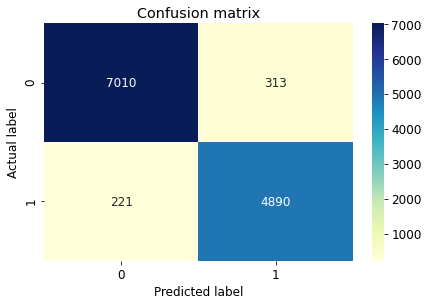

In [135]:
best_C_logreg=logreg_cv.best_estimator_
y_pred=best_C_logreg.predict(X_test_s)
cnf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Accuracy:",accuracy_score(y_test, y_pred).round(3))
print("Precision:",precision_score(y_test, y_pred).round(3))
print("Recall:",recall_score(y_test, y_pred).round(3))
print("f1 score:", f1_score(y_test, y_pred).round(3))

In [136]:
from sklearn.feature_selection import SelectFromModel
sfm=SelectFromModel(best_C_logreg, threshold=-np.inf, max_features=5)
sfm.fit(X_train_s, y_train)
feature_idx=sfm.get_support()
features_name=X.columns
feature_name=features_name[feature_idx]
feature_name

Index(['city', 'trips_in_first_30_days', 'phone', 'ultimate_black_user',
       'days_between_last_trip_and_signup'],
      dtype='object')

The most important feature is 'days_between_last_trip_and_signup'.

#### 3.2.2 random forest

In [137]:
n_estimators=[int(x) for x in np.linspace(start = 50, stop = 500, num = 10)]
max_depths=[int(x) for x in np.linspace(1, 10, num = 10)]
param_grid = {'n_estimators': n_estimators, 'max_depth':max_depths}
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions=param_grid, cv = 5, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train_s, y_train)
print("BEST PARAMS", rf_random.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.2min finished


BEST PARAMS {'n_estimators': 50, 'max_depth': 9}


Text(0.5, 12.0, 'Predicted label')

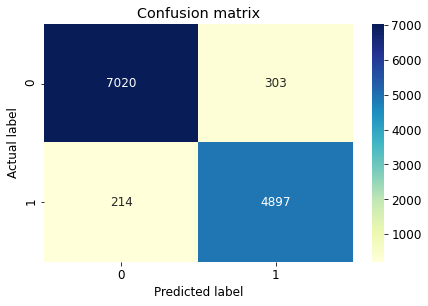

In [138]:
best_rf=rf_random.best_estimator_
y_pred=best_rf.predict(X_test_s)
cnf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [139]:
print("Accuracy:",accuracy_score(y_test, y_pred).round(3))
print("Precision:",precision_score(y_test, y_pred).round(3))
print("Recall:",recall_score(y_test, y_pred).round(3))
print("f1 score:", f1_score(y_test, y_pred).round(3))

Accuracy: 0.958
Precision: 0.942
Recall: 0.958
f1 score: 0.95


In [140]:
fea_importance=dict(zip(features_name, np.round(best_rf.feature_importances_, 2)))
sort_fea_importance={}
sorted_keys = sorted(fea_importance, key=fea_importance.get)
for i in sorted_keys:
    sort_fea_importance[i]=fea_importance[i]
print(sort_fea_importance)

{'avg_rating_of_driver': 0.0, 'city': 0.01, 'trips_in_first_30_days': 0.01, 'ultimate_black_user': 0.01, 'avg_dist': 0.01, 'phone': 0.02, 'avg_surge': 0.03, 'surge_pct': 0.03, 'weekday_pct': 0.03, 'avg_rating_by_driver': 0.04, 'days_between_last_trip_and_signup': 0.8}


The most important feature is days_between_last_trip_and_signup, followed by avg_rating_by_driver

#### 3.2.3 XGB

In [141]:
from xgboost import XGBClassifier
xgb=XGBClassifier(use_label_encoder=False)
reg_alphas=[0, 0.001, 0.005, 0.01, 0.05]
gammas=[0.1, 0.2, 0.3, 0.4, 0.5]
subsamples=[0.5, 0.6, 0.7, 0.8]
n_estimators=[int(x) for x in np.linspace(start = 50, stop = 500, num = 10)]
max_depths=[int(x) for x in np.linspace(1, 10, num = 10)]
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
param_grid = {'reg_alpha':reg_alphas, 'gamma':gammas, 'subsample': subsamples, 'n_estimators': n_estimators, 'max_depth':max_depths, 'learning_rate': learning_rates}
xgb_random = RandomizedSearchCV(estimator = xgb, param_distributions=param_grid, cv = 5, verbose=2, random_state=42, n_jobs = -1)
xgb_random.fit(X_train_s, y_train)
print("BEST PARAMS", xgb_random.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.0min finished


[10:36:28] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
BEST PARAMS {'subsample': 0.7, 'reg_alpha': 0.05, 'n_estimators': 400, 'max_depth': 1, 'learning_rate': 0.1, 'gamma': 0.4}


Text(0.5, 12.0, 'Predicted label')

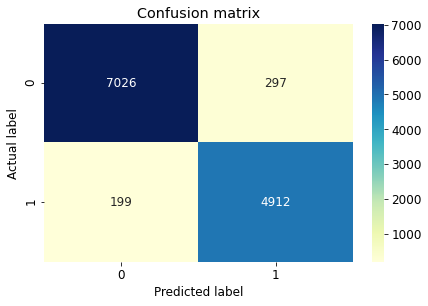

In [142]:
best_xgb=xgb_random.best_estimator_
y_pred=best_xgb.predict(X_test_s)
cnf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [143]:
print("Accuracy:",accuracy_score(y_test, y_pred).round(3))
print("Precision:",precision_score(y_test, y_pred).round(3))
print("Recall:",recall_score(y_test, y_pred).round(3))
print("f1 score:",f1_score(y_test, y_pred).round(3))

Accuracy: 0.96
Precision: 0.943
Recall: 0.961
f1 score: 0.952


In [144]:
fea_importance=dict(zip(features_name, np.round(best_xgb.feature_importances_, 2)))
sort_fea_importance={}
sorted_keys = sorted(fea_importance, key=fea_importance.get)
for i in sorted_keys:
    sort_fea_importance[i]=fea_importance[i]
print(sort_fea_importance)

{'avg_rating_of_driver': 0.0, 'avg_surge': 0.0, 'surge_pct': 0.0, 'avg_dist': 0.0, 'avg_rating_by_driver': 0.0, 'city': 0.01, 'trips_in_first_30_days': 0.01, 'weekday_pct': 0.01, 'phone': 0.03, 'ultimate_black_user': 0.03, 'days_between_last_trip_and_signup': 0.89}


Comparing all the modeling results, XGB gave us the best results. In the best model, days_between_last_trip_and_signup is the most important feature. It means the earlier the user registered for the Ultimate and keep active using it are most likely the active user. The other features like ultimate_black_user, phone, weekday_pct, trips_in_first_30_days and city are also the important features. They can help us identify the potential users. The non ultimate black iphone users should be our target population. They are more likely to become the active retained user. Moreover, the users with high weekday_pct(percentage of weekday trips) and living in Winterfell are more likely to become our prospect ultimate active users. 